In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imread

In [5]:
img = imread('ultrassound/ultrassound/cropped/503311001.bmp', as_gray=True)
mask = imread('ultrassound/ultrassound/masks/503311001.bmp')

In [3]:
mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

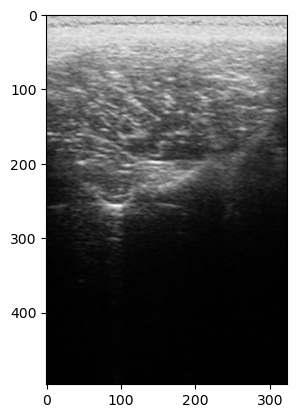

In [4]:
plt.imshow(img, cmap='gray')

In [5]:
img.shape

(497, 323)

In [6]:
img.reshape(-1,1).shape

(160531, 1)

In [7]:
img.reshape(1,-1).shape

(1, 160531)

In [8]:
from sklearn.cluster import KMeans

* Choosing The Right Number Of Clusters

The number of clusters that we choose for the algorithm shouldn’t be random. Each and Every cluster is formed by calculating and comparing the mean distances of each data points within a cluster from its centroid.

We Can Choose the right number of clusters with the help of the Within-Cluster-Sum-of-Squares (WCSS) method.

WCSS Stands for the sum of the squares of distances of the data points in each and every cluster from its centroid.

The main idea is to minimize the distance between the data points and the centroid of the clusters. The process is iterated until we reach a minimum value for the sum of distances.

WCSS for 1 clusters: 4074.298663953651
WCSS for 2 clusters: 882.8043454092474
WCSS for 3 clusters: 302.08838850771815
WCSS for 4 clusters: 159.58121649279673
WCSS for 5 clusters: 98.3303535716221
WCSS for 6 clusters: 66.98597824130928
WCSS for 7 clusters: 48.21005208344344
WCSS for 8 clusters: 37.672569079700246
WCSS for 9 clusters: 29.276276225565475


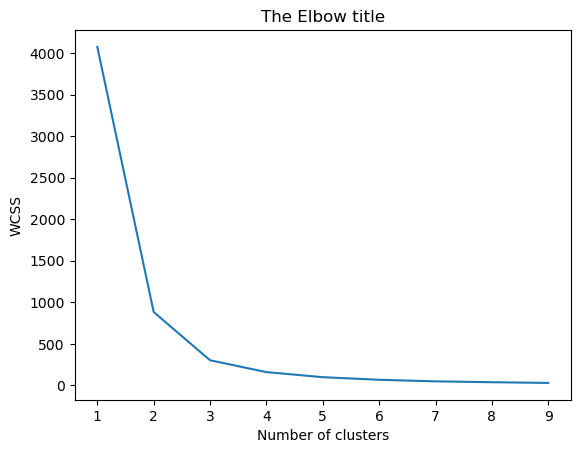

In [9]:
wcss=[]
lmt = [1, 10]
for i in range(lmt[0],lmt[1]):
    kmeans = KMeans(i)
    kmeans.fit(img.reshape(-1,1))
    wcss_iter = kmeans.inertia_
    print(f'WCSS for {i} clusters: {wcss_iter}')
    wcss.append(wcss_iter)

number_clusters = range(lmt[0],lmt[1])
plt.plot(number_clusters,wcss)
plt.title('The Elbow title')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS');

## CARREGANDO BASE

In [37]:
from glob import glob
import os

def load_images(DATABASE_PATH, classes):
    database = []
    
    for classe in classes:

        IMAGES_NAME = glob(os.path.join(DATABASE_PATH, classe, '*.bmp'))
    
        imagens = []
        for IMAGE_NAME in IMAGES_NAME:
            imagens.append(imread(IMAGE_NAME, as_gray=True))
            
        database.append(imagens)
    
    return database

In [38]:
DATABASE_PATH = 'ultrassound/ultrassound/'

classes = ['cropped', 'masks']

database = load_images(DATABASE_PATH, classes)

In [12]:
database[1]

[array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0

* Aplique o algoritmo K-means utilizando os pixels como pesos;

In [13]:
def plot_KMeans(img, lmt):
    fig = plt.figure(figsize=(15, 15))
    for i in range(lmt[0],lmt[1]):
        fig.add_subplot(3, 3, i)
        kmeans = KMeans(n_clusters=i)
        kmeans.fit(img.reshape(-1,1))
        cluster_assignment = kmeans.predict(img.reshape(-1,1))
        plt.title(f'KMeans for {i} clusters')
        plt.imshow(cluster_assignment.reshape(img.shape), cmap='gray')
    

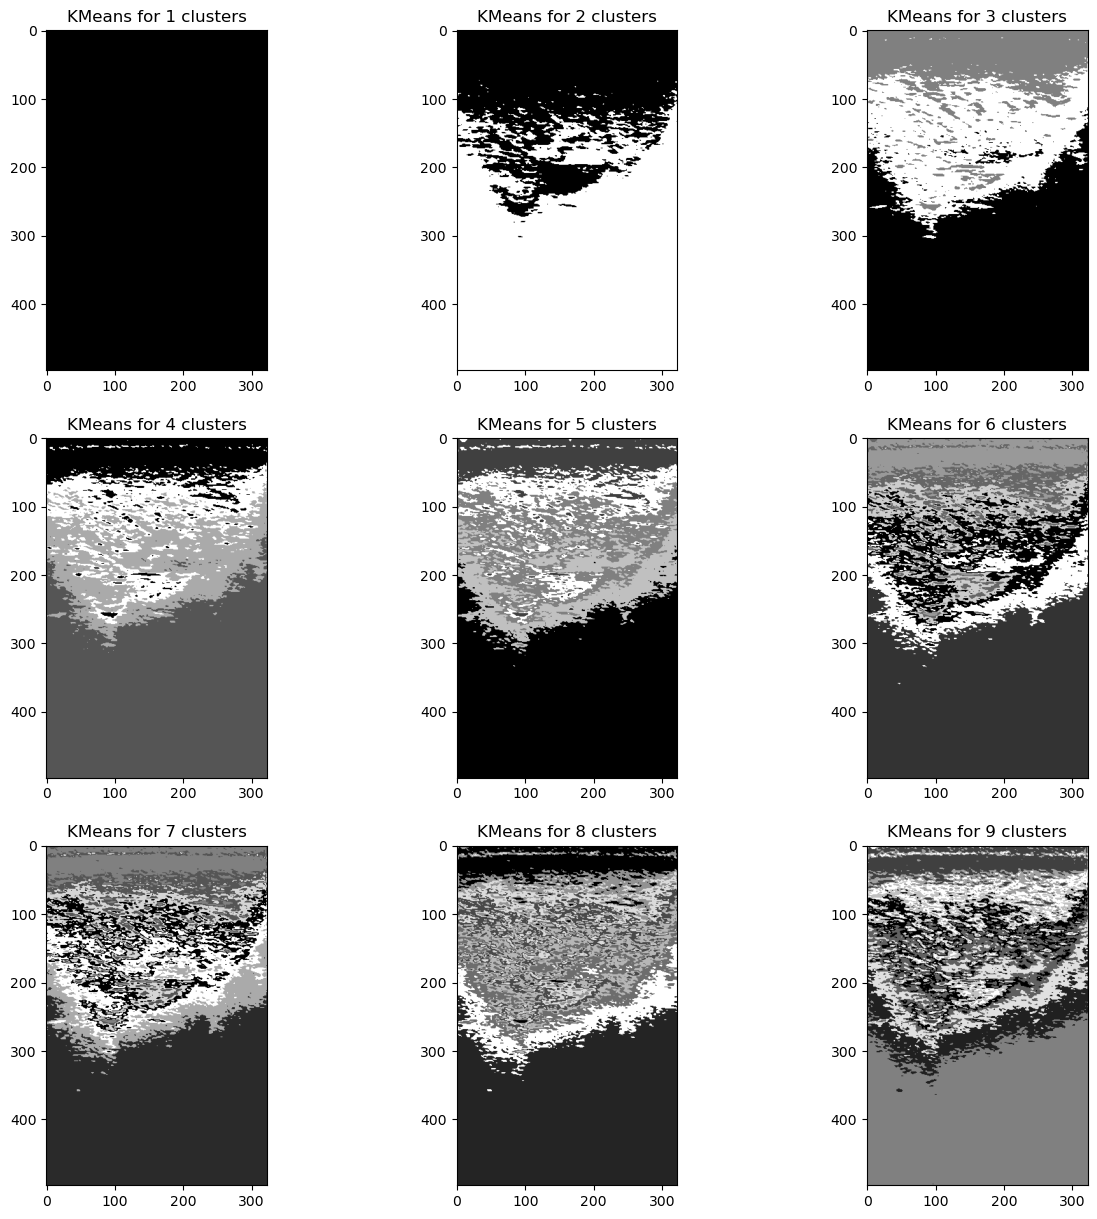

In [14]:
plot_KMeans(img, [1, 10])

In [53]:
def make_kmeans(database, k):
    kmeans = KMeans(k)
    new_database = []
    for img in database[0]:
        kmeans.fit(img.reshape(-1,1))
        cluster_assignment = kmeans.predict(img.reshape(-1,1))
        new_database.append(cluster_assignment.reshape(img.shape))
    return new_database

In [54]:
new_database = make_kmeans(database, 3)

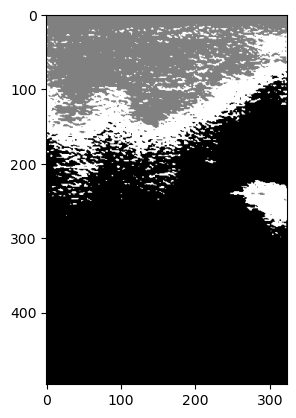

In [63]:
plt.imshow(new_database[0], cmap='gray')

* Implemente duas segmentações utilizando os algoritmos de binarização local e global (Niblack e Otsu, respectivamente);

In [15]:
from skimage.filters import threshold_niblack, threshold_otsu
from functools import partial

In [16]:
def make_thresholds(database, funcao=None):
    new_database = []
    for img in database[0]:
        threshold = funcao(img)
        new_database.append(img > threshold)
    return new_database

In [17]:
niblack_database = make_thresholds(database, partial(threshold_niblack, window_size=35, k=0.8))
otsu_database = make_thresholds(database, threshold_otsu)

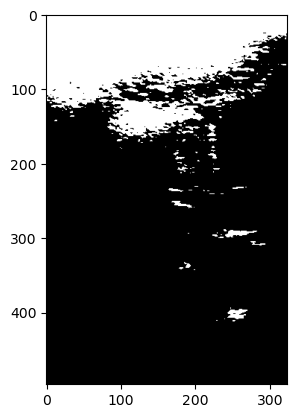

In [18]:
plt.imshow(otsu_database[1], cmap='gray')

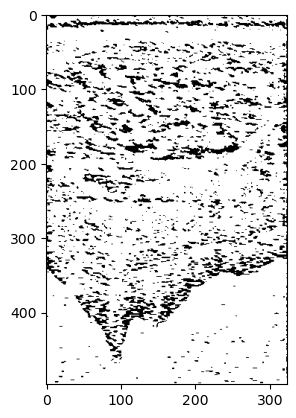

In [19]:
niblack = threshold_niblack(img, window_size=35, k=0.8)
niblack_img = img > niblack
plt.imshow(niblack_img, cmap='gray')

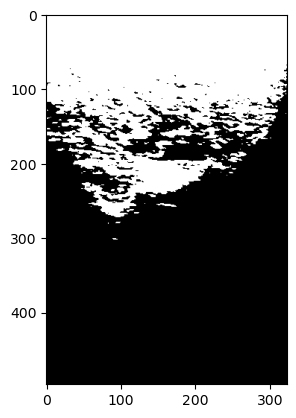

In [20]:
otsu = threshold_otsu(img)
otsu_img = img > otsu
plt.imshow(otsu_img, cmap='gray')

* Aplique   outro   algoritmo   de   agrupamento   que   utilize   também   a   posição
espacial dos pixels como peso;

In [ ]:
#obs estudar meanshift e seus parametros

In [36]:
import numpy as np
import pandas as pd
from sklearn.cluster import MeanShift, estimate_bandwidth
from matplotlib import pyplot as plt
from skimage.io import imread

In [30]:
img = imread('ultrassound/ultrassound/cropped/503311001.bmp', as_gray=True)

In [32]:
bandwidth = estimate_bandwidth(img.reshape(-1, 1), quantile=0.1, n_samples=100)    
ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)

In [33]:
ms.fit(img.reshape(-1, 1))
labels = ms.labels_
cluster_centers = ms.cluster_centers_

In [34]:
labels.shape

(160531,)

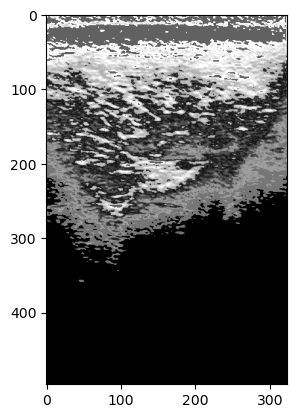

In [35]:
plt.imshow(labels.reshape(img.shape), cmap='gray')

In [39]:
def make_meanshift(database):
    new_database = []
    for img in database[0]:
        bandwidth = estimate_bandwidth(img.reshape(-1, 1), quantile=0.1, n_samples=100)    
        ms = MeanShift(bandwidth = bandwidth, bin_seeding=True)
        ms.fit(img.reshape(-1, 1))
        labels = ms.labels_
        new_database.append(labels.reshape(img.shape))
    return new_database

In [40]:
meanshift_database = make_meanshift(database)

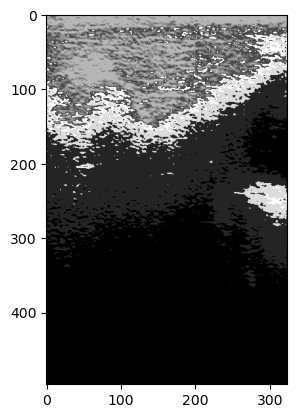

In [41]:
plt.imshow(meanshift_database[0], cmap='gray')